Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook
Combine the multiple input files to create a single dataframe. <br>
Create two bar graphs of the power consumption per hour. <br>
One bar graph has 24 bars; each bar is the average across all days for that hour<br>
one bar graph has 24*(number of days) bars.  Your choice of average or sum for each hour. Label the y-axis appropriately.<br>
Submit the .ipynb file containing the analysis and the generated pictures.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

#### Reading data from two files 

In [12]:
data1=pd.read_csv('Electricity Data\RollingSystemDemand_20191013_0451.csv')
data2=pd.read_csv('Electricity Data\RollingSystemDemand_20191013_0452.csv')

#### Taking dataset from Oct-01-2019 to Oct-10-2019 ie 10 days of data

In [13]:
data1.shape

(2001, 2)

In [14]:
data1.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20191001000000,22008.0
VD,20191001000500,22379.0
VD,20191001001000,22361.0
VD,20191001001500,22445.0
VD,20191001002000,22377.0


In [15]:
data1.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20191007222000,25160.0
VD,20191007222500,24857.0
VD,20191007223000,24631.0
VD,20191007223500,24441.0
FTR,2000,NaN


In [16]:
data2.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20191010234000,22802.0
VD,20191010234500,22747.0
VD,20191010235000,22761.0
VD,20191010235500,22715.0
FTR,864,NaN


#### The last value of the data is the count of number of rows so dropping it otherwise it will affect the dte conversion

In [17]:
data1.drop(data1.tail(1).index,inplace=True)
data2.drop(data2.tail(1).index,inplace=True)

In [18]:
data1.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20191007221500,25378.0
VD,20191007222000,25160.0
VD,20191007222500,24857.0
VD,20191007223000,24631.0
VD,20191007223500,24441.0


#### Combining the two data set

In [19]:
frames=[data1, data2]

In [20]:
data=pd.concat(frames)

In [21]:
len(data)

2864

In [22]:
data.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20191001000000,22008.0
VD,20191001000500,22379.0
VD,20191001001000,22361.0
VD,20191001001500,22445.0
VD,20191001002000,22377.0


In [23]:
data.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20191010233500,22882.0
VD,20191010234000,22802.0
VD,20191010234500,22747.0
VD,20191010235000,22761.0
VD,20191010235500,22715.0


#### Let us format the date

In [24]:
data['HDR']=data['HDR'].astype('str')

In [25]:
data['HDR']=pd.to_datetime(data['HDR'],format='%Y%m%d%H%M%S')

In [26]:
data

,HDR,ROLLING SYSTEM DEMAND
VD,2019-10-01 00:00:00,22008.0
VD,2019-10-01 00:05:00,22379.0
VD,2019-10-01 00:10:00,22361.0
VD,2019-10-01 00:15:00,22445.0
VD,2019-10-01 00:20:00,22377.0
VD,2019-10-01 00:25:00,22461.0
VD,2019-10-01 00:30:00,22515.0
VD,2019-10-01 00:35:00,22629.0
VD,2019-10-01 00:40:00,22702.0
VD,2019-10-01 00:45:00,22706.0


#### Letus make a new column and put the values of hour from the HDR column

In [27]:
hours=[]
for i in data['HDR']:
    hours.append(i.hour)

In [28]:
data['Hours'] = hours

In [29]:
data.head()

,HDR,ROLLING SYSTEM DEMAND,Hours
VD,2019-10-01 00:00:00,22008.0,0
VD,2019-10-01 00:05:00,22379.0,0
VD,2019-10-01 00:10:00,22361.0,0
VD,2019-10-01 00:15:00,22445.0,0
VD,2019-10-01 00:20:00,22377.0,0


#### Groupby hours so that we can get the average based on hours

In [30]:
dataGroupByHours=data.groupby("Hours")

#### Got the average/mean data of ROLLING SYSTEM DEMAND column and storing it into a list

In [42]:
averageSupply=list(dataGroupByHours['ROLLING SYSTEM DEMAND'].mean())
hours=np.arange(len(averageSupply))

#### Plotting the data as a bar graph

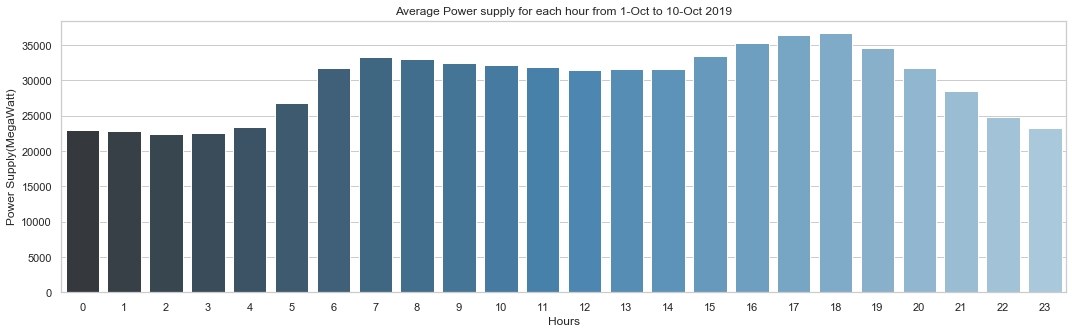

In [32]:
f, ax = plt.subplots(figsize=(18,5))
ax = sns.barplot(x=np.arange(len(averageSupply)), y=averageSupply, data=tips,palette="Blues_d")
ax.set(xlabel='Hours', ylabel='Power Supply(MegaWatt)', title='Average Power supply for each hour from 1-Oct to 10-Oct 2019')
plt.show()

#### Creating the list which contains only date and hour, converting minutes and seconds as 0. and making a new column out of it.

In [43]:
date_hour=[]
for i in data['HDR']:
    date_hour.append(i.replace(minute=0, second=0))

In [44]:
date_hour

[Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 01:00:00'),
 Timestamp('2019-10-01 02:00:00'),
 Timestamp('2019-10-01 02:00:00'),
 Timestamp('2019-10-01 02:00:00'),
 Timestamp('2019-10-01 02:00:00'),
 Timestamp('2019-10-

In [36]:
data['Date_Hour']=date_hour

#### Grouping by the Date_Hour and columns

In [45]:
dataGroupByDateHour=data.groupby("Date_Hour")

#### so getting the sum of supply for each hour and each day

In [46]:
supplyHourPerDay=list(dataGroupByDateHour['ROLLING SYSTEM DEMAND'].sum())

In [ ]:
#### Plotting 24*10 bars representing sum of power supply for each hour in 10 days

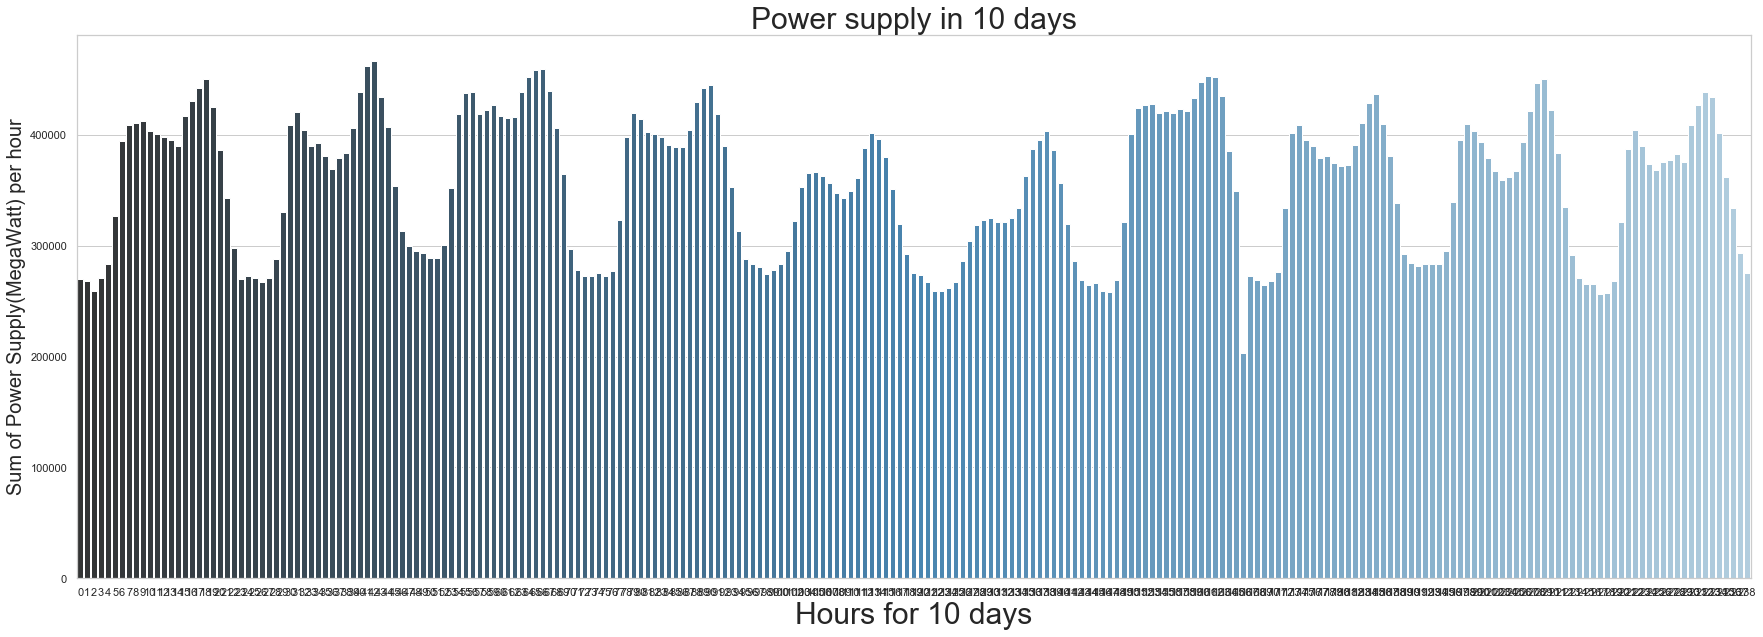

In [41]:
f, ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(x=np.arange(len(dataGroupByDateHour)), y=supplyHourPerDay, data=tips,palette="Blues_d")
ax.set_xlabel("Hours for 10 days",fontsize=30)
ax.set_ylabel("Sum of Power Supply(MegaWatt) per hour",fontsize=20)
ax.set_title("Power supply in 10 days",fontsize=30)
plt.show()